In [11]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=np.genfromtxt(fname='/home/pawan/Desktop/breast-cancer-wisconsin.data.txt',delimiter=',',dtype=float)

In [13]:
print(np.shape(data))
print(data[0,0:])

(699, 11)
[  1.00002500e+06   5.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   2.00000000e+00   1.00000000e+00   3.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00]


In [14]:
new_data=np.delete(data,obj=0,axis=1)
print(new_data[0:5,0:])

[[  5.   1.   1.   1.   2.   1.   3.   1.   1.   2.]
 [  5.   4.   4.   5.   7.  10.   3.   2.   1.   2.]
 [  3.   1.   1.   1.   2.   2.   3.   1.   1.   2.]
 [  6.   8.   8.   1.   3.   4.   3.   7.   1.   2.]
 [  4.   1.   1.   3.   2.   1.   3.   1.   1.   2.]]


In [15]:
X=new_data[:,:9]
Y=new_data[:,9]

In [16]:
new_data=Imputer(missing_values='NaN',strategy='median',axis=0)
X=new_data.fit_transform(X)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=12)
Y_test=Y_test.ravel()
Y_train=Y_train.ravel()

In [18]:
acc=[]
for k in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    y_pred = neigh.predict(X_test)
    print (accuracy_score(Y_test,y_pred)*100)
    acc.append(accuracy_score(Y_test,y_pred)*100)

96.4285714286
94.6428571429
97.8571428571
97.5
98.2142857143
97.8571428571
98.2142857143
98.2142857143
98.2142857143
98.2142857143
98.2142857143
98.2142857143
98.2142857143
97.8571428571
97.8571428571
97.8571428571
97.8571428571
97.8571428571
97.8571428571
97.5
97.8571428571
97.5
97.8571428571
97.5


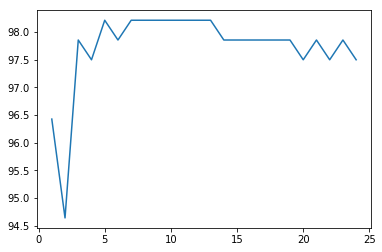

In [19]:
k=range(1,25)
plt.plot(k,acc)
plt.show()